# Import

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import linear_model #build linear regressioon model
from sklearn.metrics import mean_squared_error, r2_score #compute performance

from sklearn.tree import DecisionTreeClassifier


# Load & Understand Data

In [261]:
df = pd.read_csv('cleaned_tobacco.csv')
df

,Year,State,Tobacco Use,Demographic,Comparing (Focus group),Cigarette Use Prevalence % (Focus group),To (Reference group),Cigarette Use Prevalence % (Reference group),Disparity Value
0,2011,Alabama,Cigarette Use among Adults,Age,Age 18-24,30.3,Age 25-44,28.1,1.1
1,2011,Alabama,Cigarette Use among Adults,Age,Age 18-24,30.3,Age 45-64,26.0,1.2
2,2011,Alabama,Cigarette Use among Adults,Age,Age 18-24,30.3,Age 65 or older,10.2,3.0
3,2011,Alabama,Cigarette Use among Adults,Age,Age 25-44,28.1,Age 18-24,30.3,0.9
4,2011,Alabama,Cigarette Use among Adults,Age,Age 25-44,28.1,Age 45-64,26.0,1.1
...,...,...,...,...,...,...,...,...,...
38105,2022,West Virginia,Cigarette Use among Adults,Urban-Rural,Urban,20.8,Rural,21.7,1.0
38106,2022,Wisconsin,Cigarette Use among Adults,Urban-Rural,Rural,17.1,Urban,13.7,1.2
38107,2022,Wisconsin,Cigarette Use among Adults,Urban-Rural,Urban,13.7,Rural,17.1,0.8
38108,2022,Wyoming,Cigarette Use among Adults,Urban-Rural,Rural,13.5,Urban,16.3,0.8


In [262]:
df.columns

Index(['Year', 'State', 'Tobacco Use', 'Demographic',
       'Comparing (Focus group)', 'Cigarette Use Prevalence % (Focus group)',
       'To (Reference group)', 'Cigarette Use Prevalence % (Reference group)',
       'Disparity Value'],
      dtype='object')

In [263]:
df.describe()

,Year,Cigarette Use Prevalence % (Focus group),Cigarette Use Prevalence % (Reference group),Disparity Value
count,38110.000000,38110.000000,38110.000000,38110.000000
mean,2016.529861,19.793007,19.793070,1.301475
std,3.445697,9.794711,9.794716,1.009104
min,2011.000000,2.100000,2.100000,0.100000
25%,2014.000000,12.100000,12.100000,0.600000
50%,2017.000000,18.100000,18.100000,1.000000
75%,2020.000000,25.300000,25.300000,1.700000
max,2022.000000,61.500000,61.500000,10.800000


In [264]:
df.shape

(38110, 9)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38110 entries, 0 to 38109
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          38110 non-null  int64  
 1   State                                         38110 non-null  object 
 2   Tobacco Use                                   38110 non-null  object 
 3   Demographic                                   38110 non-null  object 
 4   Comparing (Focus group)                       38110 non-null  object 
 5   Cigarette Use Prevalence % (Focus group)      38110 non-null  float64
 6   To (Reference group)                          38110 non-null  object 
 7   Cigarette Use Prevalence % (Reference group)  38110 non-null  float64
 8   Disparity Value                               38110 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


# PLots

## Scatter Plot


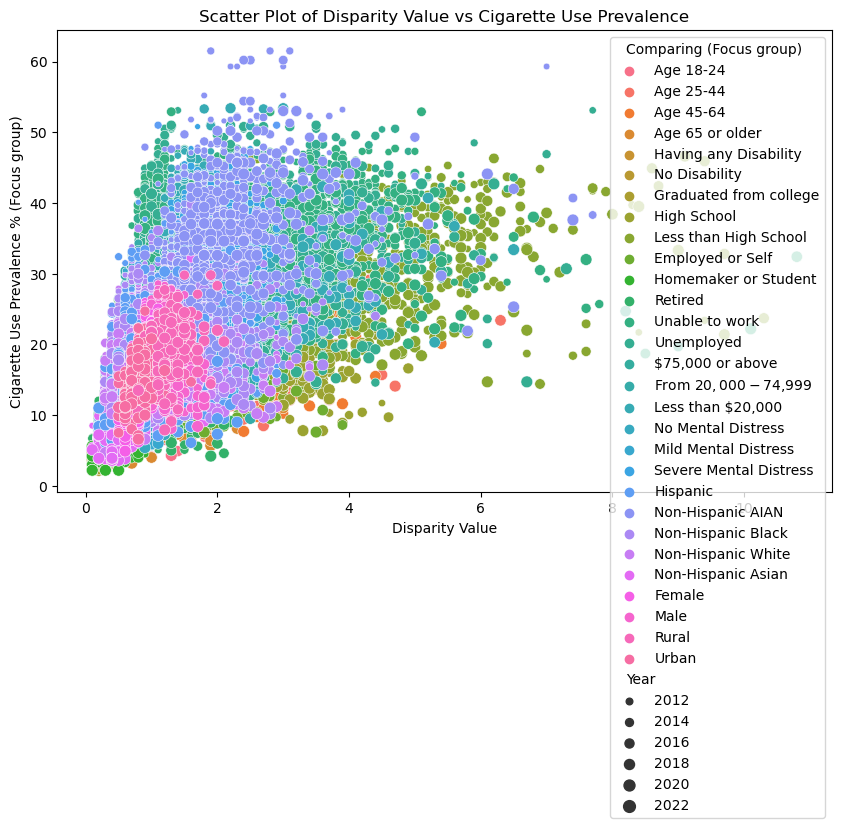

In [266]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Disparity Value", y="Cigarette Use Prevalence % (Focus group)", data=df, hue="Comparing (Focus group)", size='Year')
plt.title("Scatter Plot of Disparity Value vs Cigarette Use Prevalence")
plt.xlabel("Disparity Value")
plt.ylabel("Cigarette Use Prevalence % (Focus group)")
plt.show()

## Line Plot


C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


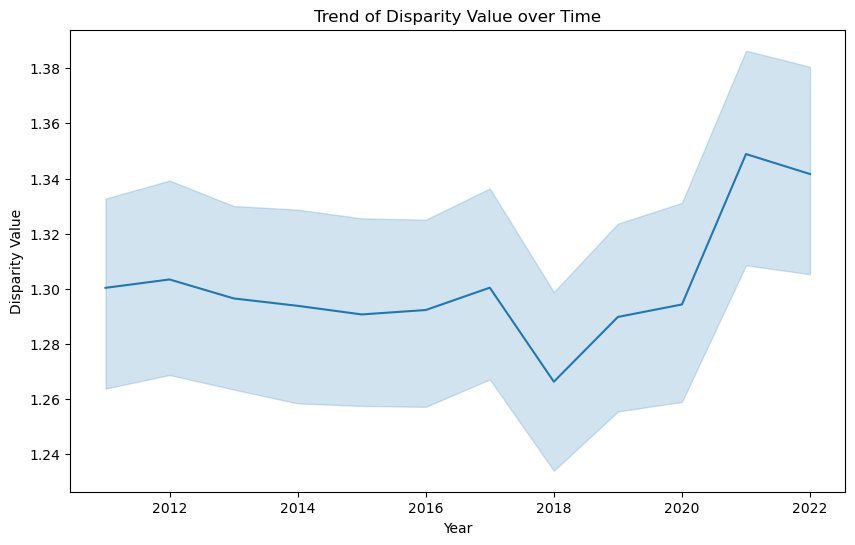

In [267]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Disparity Value", data=df)
plt.title("Trend of Disparity Value over Time")
plt.xlabel("Year")
plt.ylabel("Disparity Value")
plt.show()

## Bar Plot


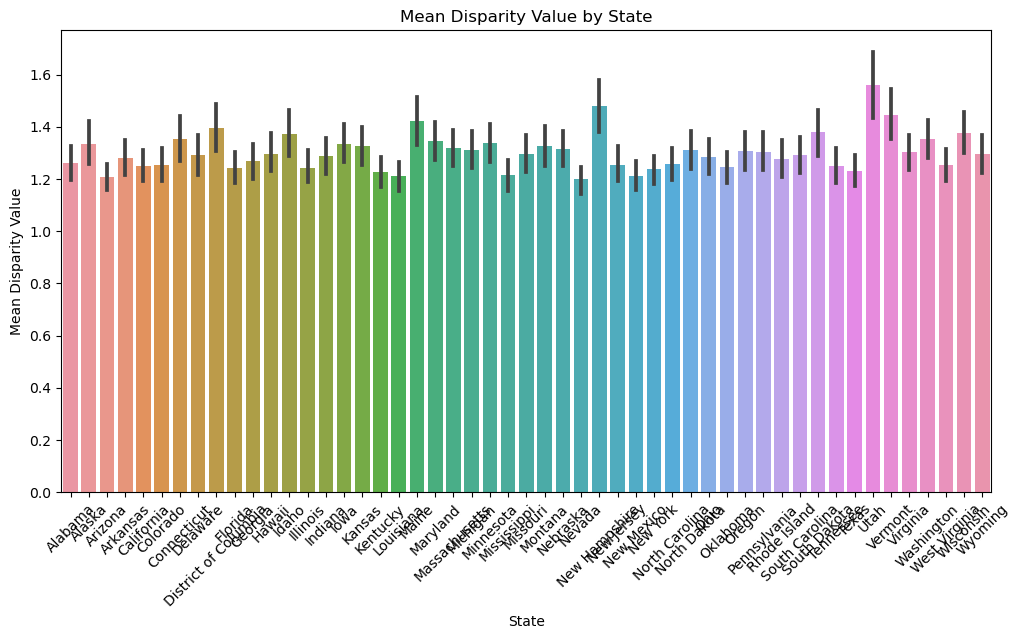

In [268]:
plt.figure(figsize=(12, 6))
sns.barplot(x="State", y="Disparity Value", data=df)
plt.title("Mean Disparity Value by State")
plt.xlabel("State")
plt.ylabel("Mean Disparity Value")
plt.xticks(rotation=45)
plt.show()

## Histogram


C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


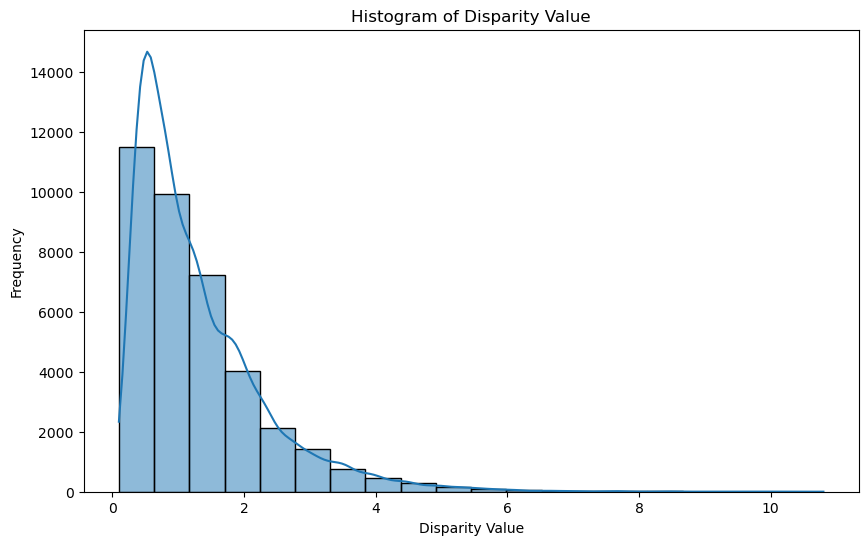

In [269]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Disparity Value"], bins=20, kde=True)
plt.title("Histogram of Disparity Value")
plt.xlabel("Disparity Value")
plt.ylabel("Frequency")
plt.show()

## Violin Plot


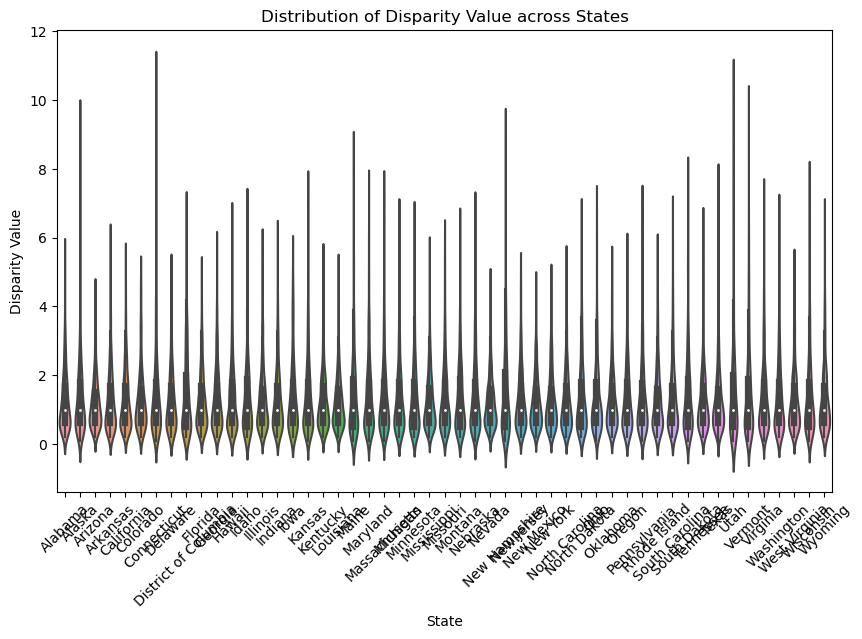

In [270]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="State", y="Disparity Value", data=df)
plt.title("Distribution of Disparity Value across States")
plt.xlabel("State")
plt.ylabel("Disparity Value")
plt.xticks(rotation=45)
plt.show()

## Heatmap


In [271]:
df.corr(numeric_only=True)

,Year,Cigarette Use Prevalence % (Focus group),Cigarette Use Prevalence % (Reference group),Disparity Value
Year,1.000000,-0.215622,-0.215614,0.009057
Cigarette Use Prevalence % (Focus group),-0.215622,1.000000,-0.000175,0.608945
Cigarette Use Prevalence % (Reference group),-0.215614,-0.000175,1.000000,-0.602175
Disparity Value,0.009057,0.608945,-0.602175,1.000000


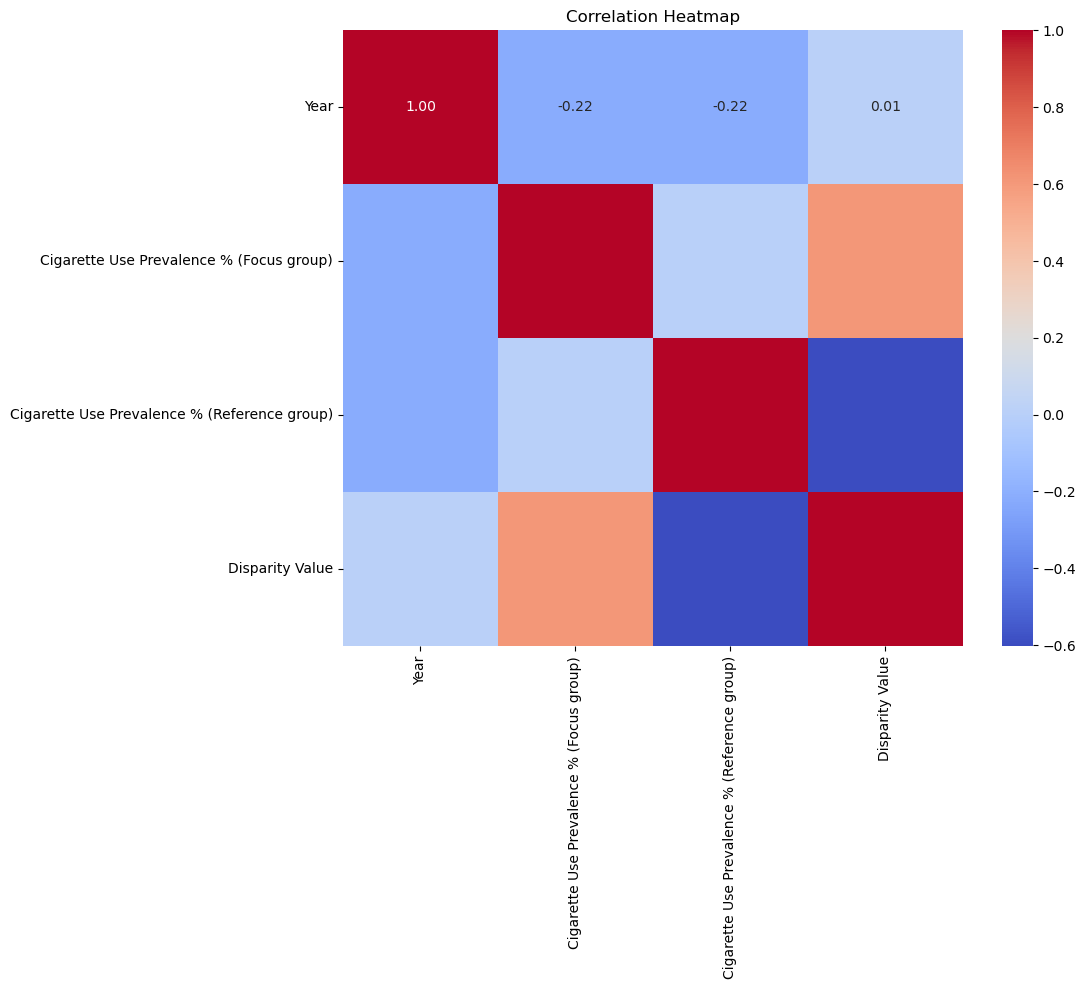

In [272]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Pairplot


C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


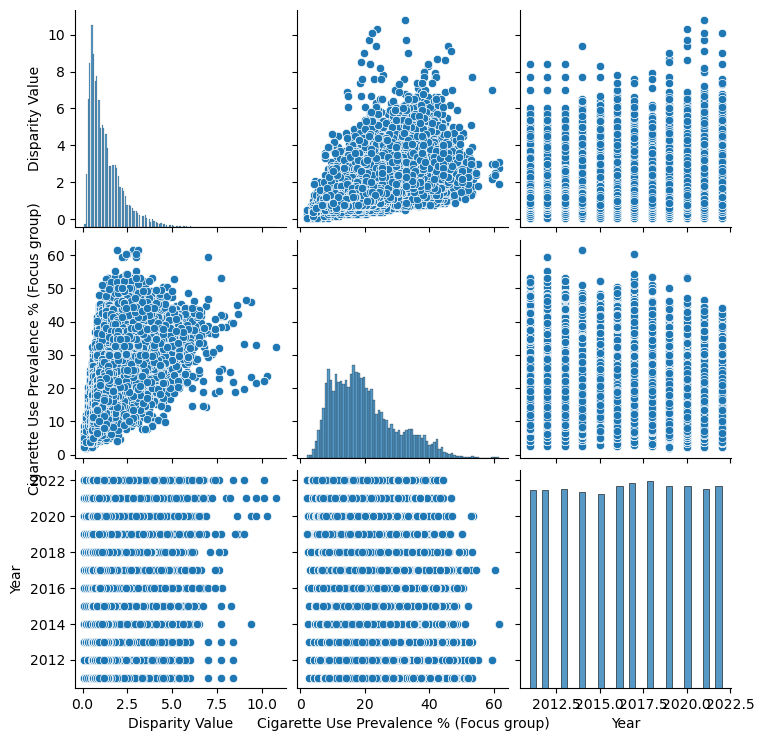

In [273]:
sns.pairplot(df, vars=["Disparity Value", "Cigarette Use Prevalence % (Focus group)", "Year"])
plt.show()

## Joint Plot


C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


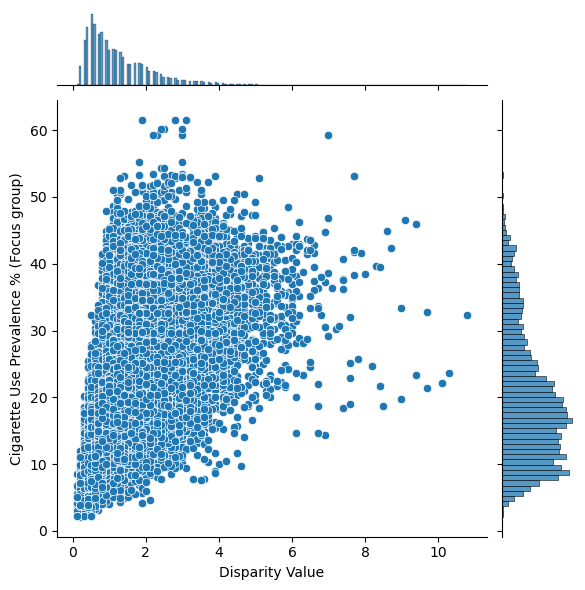

In [274]:
sns.jointplot(x="Disparity Value", y="Cigarette Use Prevalence % (Focus group)", data=df, kind="scatter")
plt.show()

# Feature Engineering

## creating unique nummerical data for labels

In [275]:
df.head()

,Year,State,Tobacco Use,Demographic,Comparing (Focus group),Cigarette Use Prevalence % (Focus group),To (Reference group),Cigarette Use Prevalence % (Reference group),Disparity Value
0,2011,Alabama,Cigarette Use among Adults,Age,Age 18-24,30.3,Age 25-44,28.1,1.1
1,2011,Alabama,Cigarette Use among Adults,Age,Age 18-24,30.3,Age 45-64,26.0,1.2
2,2011,Alabama,Cigarette Use among Adults,Age,Age 18-24,30.3,Age 65 or older,10.2,3.0
3,2011,Alabama,Cigarette Use among Adults,Age,Age 25-44,28.1,Age 18-24,30.3,0.9
4,2011,Alabama,Cigarette Use among Adults,Age,Age 25-44,28.1,Age 45-64,26.0,1.1


In [276]:

df.drop(columns=['Tobacco Use'], inplace=True)

In [277]:
df['State'].unique()



array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [278]:
df['Demographic'].unique()


array(['Age', 'Disability', 'Education', 'Employment', 'Income',
       'Mental Health', 'Race and Ethnicity', 'Sex at Birth',
       'Urban-Rural'], dtype=object)

In [279]:
df['Comparing (Focus group)'].unique()


array(['Age 18-24', 'Age 25-44', 'Age 45-64', 'Age 65 or older',
       'Having any Disability', 'No Disability', 'Graduated from college',
       'High School', 'Less than High School', 'Employed or Self',
       'Homemaker or Student', 'Retired', 'Unable to work', 'Unemployed',
       '$75,000 or above', 'From $20,000-$74,999', 'Less than $20,000',
       'No Mental Distress', 'Mild Mental Distress',
       'Severe Mental Distress', 'Hispanic', 'Non-Hispanic AIAN',
       'Non-Hispanic Black', 'Non-Hispanic White', 'Non-Hispanic Asian',
       'Female', 'Male', 'Rural', 'Urban'], dtype=object)

In [280]:
df['To (Reference group)'].unique()


array(['Age 25-44', 'Age 45-64', 'Age 65 or older', 'Age 18-24',
       'No Disability', 'Having any Disability', 'High School',
       'Less than High School', 'Graduated from college',
       'Homemaker or Student', 'Retired', 'Unable to work', 'Unemployed',
       'Employed or Self', 'From $20,000-$74,999', 'Less than $20,000',
       '$75,000 or above', 'Mild Mental Distress',
       'Severe Mental Distress', 'No Mental Distress',
       'Non-Hispanic AIAN', 'Non-Hispanic Black', 'Non-Hispanic White',
       'Hispanic', 'Non-Hispanic Asian', 'Male', 'Female', 'Urban',
       'Rural'], dtype=object)

In [281]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [282]:
df['State'] = label_encoder.fit_transform(df['State'])
df['Demographic'] = label_encoder.fit_transform(df['Demographic'])
df['Comparing (Focus group)'] = label_encoder.fit_transform(df['Comparing (Focus group)'])
df['To (Reference group)'] = label_encoder.fit_transform(df['To (Reference group)'])

## Using Box Plot to Handle Outliers


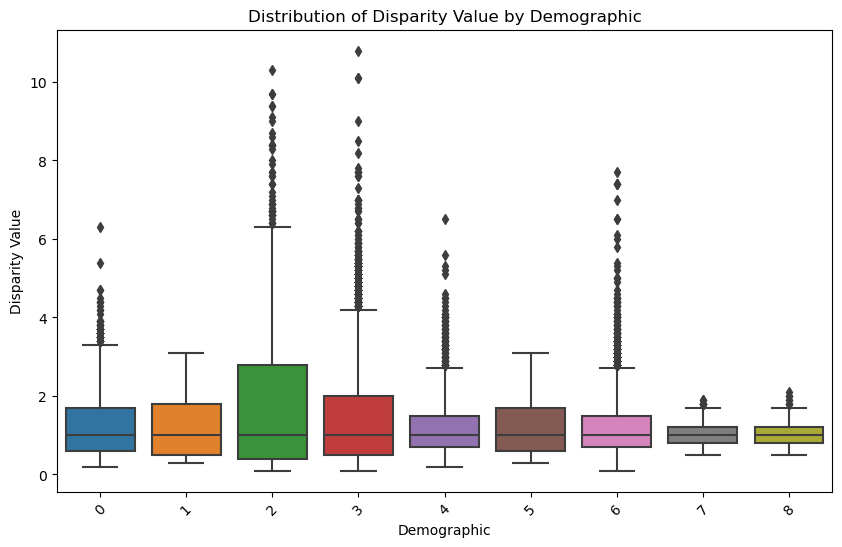

In [283]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Demographic", y="Disparity Value", data=df)
plt.title("Distribution of Disparity Value by Demographic")
plt.xlabel("Demographic")
plt.ylabel("Disparity Value")
plt.xticks(rotation=45)
plt.show()

### Inter-Quartile-Range for removing outliers

In [284]:
Q1 = df['Disparity Value'].quantile(0.25)
Q3 = df['Disparity Value'].quantile(0.75)

IQR = Q3 - Q1 #remove values that are above the 75th percentile and below the 25th

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers_1 = df[(df['Disparity Value'] >= lower_bound) & (df['Disparity Value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", df.shape)
print("New data shape without outliers:", df_no_outliers_1.shape)

Original data shape: (38110, 8)
New data shape without outliers: (36237, 8)


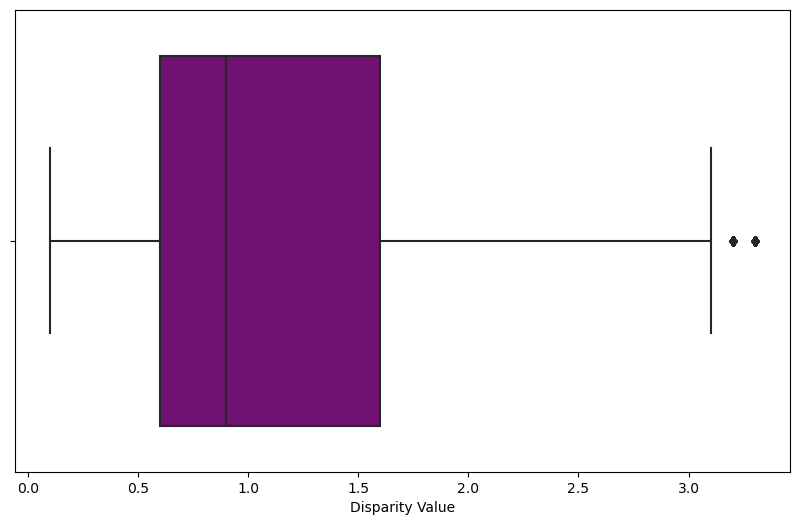

In [285]:
# use boxplot to detect outliers

plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers_1['Disparity Value'], color='purple')
plt.xlabel('Disparity Value')
plt.show()

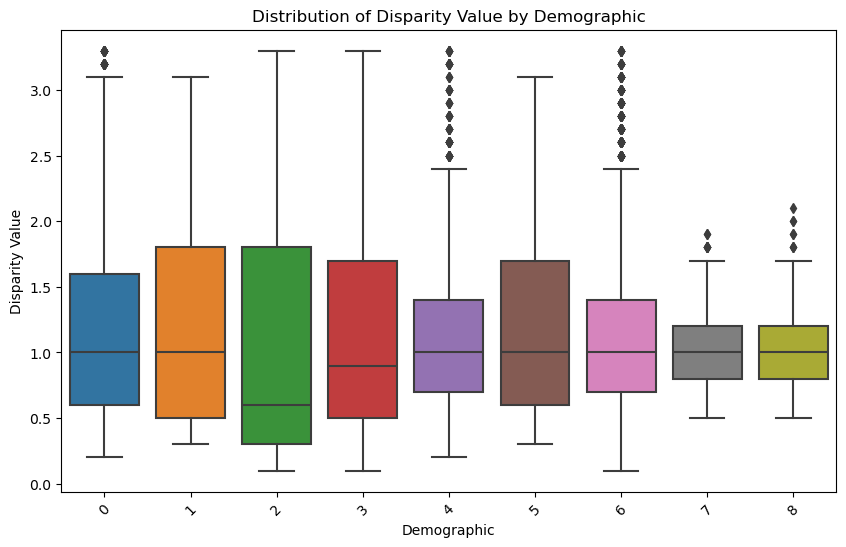

In [286]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Demographic", y="Disparity Value", data=df_no_outliers_1)
plt.title("Distribution of Disparity Value by Demographic")
plt.xlabel("Demographic")
plt.ylabel("Disparity Value")
plt.xticks(rotation=45)
plt.show()

In [287]:
Q1 = df_no_outliers_1['Disparity Value'].quantile(0.25)
Q3 = df_no_outliers_1['Disparity Value'].quantile(0.75)

IQR = Q3 - Q1 #remove values that are above the 75th percentile and below the 25th

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers_2 = df_no_outliers_1[(df_no_outliers_1['Disparity Value'] >= lower_bound) & (df_no_outliers_1['Disparity Value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", df_no_outliers_1.shape)
print("New data shape without outliers:", df_no_outliers_2.shape)

Original data shape: (36237, 8)
New data shape without outliers: (35859, 8)


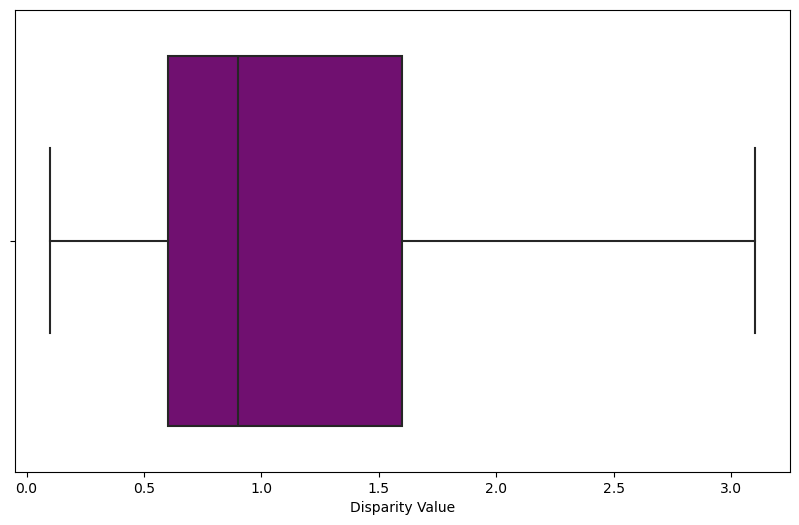

In [288]:
# use boxplot to detect outliers

plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers_2['Disparity Value'], color='purple')
plt.xlabel('Disparity Value')
plt.show()

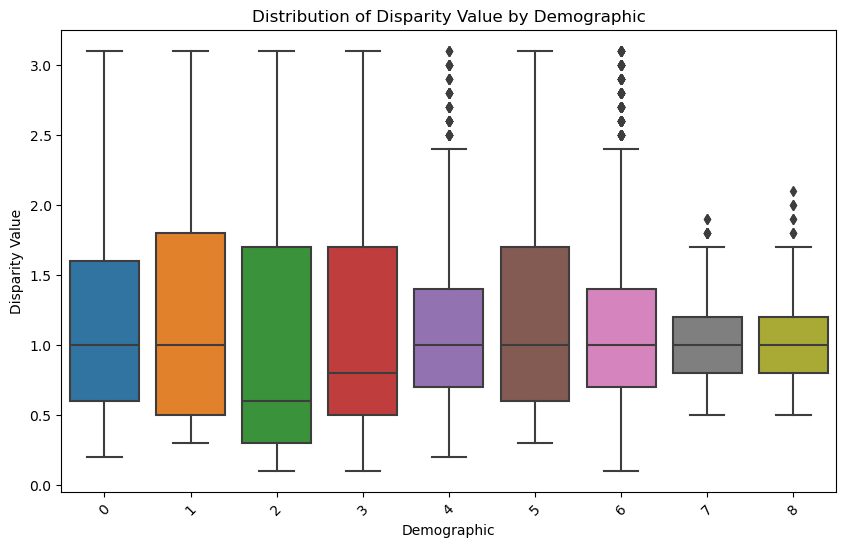

In [289]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Demographic", y="Disparity Value", data=df_no_outliers_2)
plt.title("Distribution of Disparity Value by Demographic")
plt.xlabel("Demographic")
plt.ylabel("Disparity Value")
plt.xticks(rotation=45)
plt.show()

## Split Data

### Outliers

In [290]:

df.columns

Index(['Year', 'State', 'Demographic', 'Comparing (Focus group)',
       'Cigarette Use Prevalence % (Focus group)', 'To (Reference group)',
       'Cigarette Use Prevalence % (Reference group)', 'Disparity Value'],
      dtype='object')

In [291]:
X = df[['Year', 'State', 'Demographic', 'Comparing (Focus group)', 'Cigarette Use Prevalence % (Focus group)', 'To (Reference group)', 'Cigarette Use Prevalence % (Reference group)']]
y = df['Disparity Value']

In [292]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### No Outliers

In [293]:
df_no_outliers_2.columns

Index(['Year', 'State', 'Demographic', 'Comparing (Focus group)',
       'Cigarette Use Prevalence % (Focus group)', 'To (Reference group)',
       'Cigarette Use Prevalence % (Reference group)', 'Disparity Value'],
      dtype='object')

In [294]:
X_no_outliers_2 = df_no_outliers_2[['Year', 'State', 'Demographic', 'Comparing (Focus group)', 'Cigarette Use Prevalence % (Focus group)', 'To (Reference group)', 'Cigarette Use Prevalence % (Reference group)']]
y_no_outliers_2 = df_no_outliers_2['Disparity Value']

In [295]:
#split
X_train_no_outliers_2 , X_test_no_outliers_2 , y_train_no_outliers_2 , y_test_no_outliers_2  = train_test_split(X_no_outliers_2, y_no_outliers_2, test_size=0.2, random_state=1)

## Feature Scalling (Standardization/normalization)

### Train

#### Outliers

In [296]:
scaler = StandardScaler().fit(X_train)

In [297]:
#transform
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.02311395e+00,  4.13806221e-01, -1.53352719e+00, ...,
        -8.13626162e-03, -1.18964615e+00,  1.02964687e-01],
       [-7.32762950e-01, -7.43592632e-01, -1.02773259e-01, ...,
         2.24981893e+00, -1.68213687e-01, -3.97296084e-01],
       [-1.31346495e+00, -1.69674463e+00,  1.32798067e+00, ...,
         1.71853536e+00, -2.81706183e-01, -1.72689207e-01],
       ...,
       [ 7.18992039e-01,  1.41477079e-01, -1.53352719e+00, ...,
        -9.68533493e-01, -1.07615365e+00, -1.23446717e+00],
       [-1.60381594e+00,  4.13806221e-01, -1.02773259e-01, ...,
         2.08073020e-03, -1.68213687e-01, -7.64834610e-01],
       [-4.42411952e-01, -6.07428061e-01,  1.32798067e+00, ...,
        -2.53344065e-01,  8.53218775e-01,  5.41969038e-01]])

In [298]:
X_train_scaled.mean(axis=0)
#its mean should be 0 if its standardized

array([ 1.17395233e-14,  2.42378787e-17,  1.49156176e-17, -1.24685241e-17,
       -2.77337266e-17, -1.25151354e-16,  1.75957677e-17])

In [299]:
X_train_scaled.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1., 1.])

#### No outliers

In [300]:
scaler_no_outliers_2 = StandardScaler().fit(X_train_no_outliers_2 )

In [301]:
#transform
X_train_scaled_no_outliers_2 = scaler.transform(X_train_no_outliers_2)
X_train_scaled_no_outliers_2

array([[-1.60381594, -1.49249777, -0.10277326, ...,  0.1655526 ,
         1.53417375,  3.12494812],
       [ 0.71899204,  1.36695822,  0.37414472, ...,  0.86030804,
        -0.73567617,  0.38882799],
       [-1.31346495, -1.49249777, -0.10277326, ...,  0.1655526 ,
         1.08020377, -0.87713805],
       ...,
       [ 0.71899204,  0.61805308, -1.53352719, ..., -0.44746691,
        -1.07615365, -0.98944149],
       [-1.31346495,  0.27764165, -0.10277326, ..., -0.46790089,
         1.08020377, -1.19362956],
       [ 1.00934304, -1.28825092,  1.32798067, ..., -0.88679756,
         0.85321878, -0.45855251]])

In [302]:
X_train_scaled_no_outliers_2.mean(axis=0)
#its mean should be 0 if its standardized

array([-0.00095941, -0.00164595,  0.01557927, -0.05217697, -0.0806389 ,
       -0.0048489 ,  0.07165886])

In [303]:
X_train_scaled.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1., 1.])

### Test

#### outliers

In [304]:
scaler1 = StandardScaler().fit(X_test)

In [305]:
#transform
X_test_scaled = scaler1.transform(X_test)
X_test_scaled

array([[-0.45034109,  0.25827917,  0.86285159, ...,  1.27807255,
         0.30276618, -0.28585281],
       [-0.16062976, -1.64198311, -0.56416739, ..., -1.25699726,
        -0.37596435,  0.06132087],
       [ 1.57763819,  0.12254615, -0.56416739, ..., -1.3588073 ,
        -0.37596435, -0.47986164],
       ...,
       [-0.45034109, -1.16691754, -1.51551338, ..., -0.98211017,
        -1.28093839, -0.50028362],
       [-1.31947506,  1.00481079, -0.0884944 , ..., -1.0533772 ,
         1.43398372,  1.37853867],
       [ 0.12908156,  1.14054381,  1.33852458, ...,  0.20906721,
         0.86837495,  0.3574396 ]])

In [306]:
X_test_scaled.mean(axis=0)
#its mean should be 0 if its standardized

array([ 2.93763090e-14, -1.02078758e-16,  7.73747666e-17,  6.33913750e-17,
       -1.53817307e-16,  9.27564973e-17, -3.44923658e-17])

In [307]:
X_test_scaled.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1., 1.])

#### no otliers

In [308]:
scaler1_no_outliers_2 = StandardScaler().fit(X_test_no_outliers_2)

In [309]:
#transform
X_test_scaled_no_outliers_2 = scaler1.transform(X_test)
X_test_scaled_no_outliers_2

array([[-0.45034109,  0.25827917,  0.86285159, ...,  1.27807255,
         0.30276618, -0.28585281],
       [-0.16062976, -1.64198311, -0.56416739, ..., -1.25699726,
        -0.37596435,  0.06132087],
       [ 1.57763819,  0.12254615, -0.56416739, ..., -1.3588073 ,
        -0.37596435, -0.47986164],
       ...,
       [-0.45034109, -1.16691754, -1.51551338, ..., -0.98211017,
        -1.28093839, -0.50028362],
       [-1.31947506,  1.00481079, -0.0884944 , ..., -1.0533772 ,
         1.43398372,  1.37853867],
       [ 0.12908156,  1.14054381,  1.33852458, ...,  0.20906721,
         0.86837495,  0.3574396 ]])

In [310]:
X_test_scaled_no_outliers_2.mean(axis=0)
#its mean should be 0 if its standardized

array([ 2.93763090e-14, -1.02078758e-16,  7.73747666e-17,  6.33913750e-17,
       -1.53817307e-16,  9.27564973e-17, -3.44923658e-17])

In [311]:
X_test_scaled_no_outliers_2.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1., 1.])

# Simple Linear Regression with outliere

## Build Linear Regression

In [312]:
model = linear_model.LinearRegression()

## Build Traing Model

In [313]:
model.fit(X_train_scaled, y_train)

LinearRegression()

## Make Predictions

In [314]:
y_pred = model.predict(X_test_scaled)

## Analysis

In [315]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coefficients, {model.coef_}')
print(f'Intercept, {model.intercept_}')
print(f'Mean Squared Error {mse:.2f}')
print(f'Coefficient of determination {r2:.2f}')

Coefficients, [ 0.00385517  0.01405941 -0.1537322   0.02508904  0.62345274  0.16487819
 -0.65408233]
Intercept, 1.302587903437418
Mean Squared Error 0.23
Coefficient of determination 0.77


In [316]:
X.columns

Index(['Year', 'State', 'Demographic', 'Comparing (Focus group)',
       'Cigarette Use Prevalence % (Focus group)', 'To (Reference group)',
       'Cigarette Use Prevalence % (Reference group)'],
      dtype='object')

In [317]:
# Fomula of  sstraight line is Y = mx + c
# The equation o this linear regression model(model) is [y = 3.85517160e-03(Year) + 1.40594089e-02(State) + 1.80411242e-16(Tobacco Use) -1.53732204e-01(Demographic) + 2.50890390e-02(Comparing (Focus group)) +  6.23452740e-01(Cigarette Use Prevalence % (Focus group)) +  1.64878189e-01(To (Reference group)) -6.54082330e-01(Cigarette Use Prevalence % (Reference group)) + { 1.302587903437418}]

# the Coefficients are accociated to the features from the X varible so you just muliply the Coefficients by their associate feater and add everything toger plus the intercep

# Simple Linear Regression without outliere

## Build Linear Regression

In [318]:
model_no_outliers_2 = linear_model.LinearRegression()

## Build Traing Model

In [319]:
model_no_outliers_2.fit(X_train_scaled_no_outliers_2, y_train_no_outliers_2)

LinearRegression()

## Make Predictions

In [323]:
y_pred_no_outliers_2 = model_no_outliers_2.predict(X_test_scaled_no_outliers_2)

In [325]:
y_pred_no_outliers_2.shape

(7622,)

In [328]:
y_test_no_outliers_2.shape

(7172,)

In [329]:
X_test_scaled_no_outliers_2.shape

(7622, 7)

## Analysis

In [321]:
mse = mean_squared_error(y_test_no_outliers_2, y_pred_no_outliers_2)
r2 = r2_score(y_test_no_outliers_2, y_pred_no_outliers_2)

print(f'Coefficients, {model_no_outliers_2.coef_}')
print(f'Intercept, {model_no_outliers_2.intercept_}')
print(f'Mean Squared Error {mse:.2f}')
print(f'Coefficient of determination {r2:.2f}')

ValueError: Found input variables with inconsistent numbers of samples: [7172, 7622]

# Visualize

## outliiers

In [ ]:
y_pred.shape

In [ ]:
y_test_arr = np.array(y_test)
y_test_arr.shape

In [ ]:
sns.regplot(x=y_test_arr, y=y_pred, marker="+")

## no outliers

In [ ]:
y_pred_no_outliers_2.shape

In [ ]:
y_test_arr_no_outliers_2 = np.array(y_test_no_outliers_2)
y_test_arr_no_outliers_2.shape

In [ ]:
sns.regplot(x=y_test_arr_no_outliers_2, y=y_pred_no_outliers_2, marker="+")